In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

# For example, here's several helpful packages to load
import sys

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import tensorflow as tf
from tensorflow import keras
# "Sequential model lets us to define a stack of neural network layers"
from keras.models import Sequential
# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
# CNN
from keras.layers import Convolution2D, MaxPooling2D, Convolution1D
# import some utilities to transform our data
#from keras.utils import np_utils
from keras.utils import to_categorical
import numpy as np # linear algebra
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
sys.path.append('.\\')
dataPath = 'data\\heart-failure-clinical-data\\heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(dataPath)

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.shape

(299, 13)

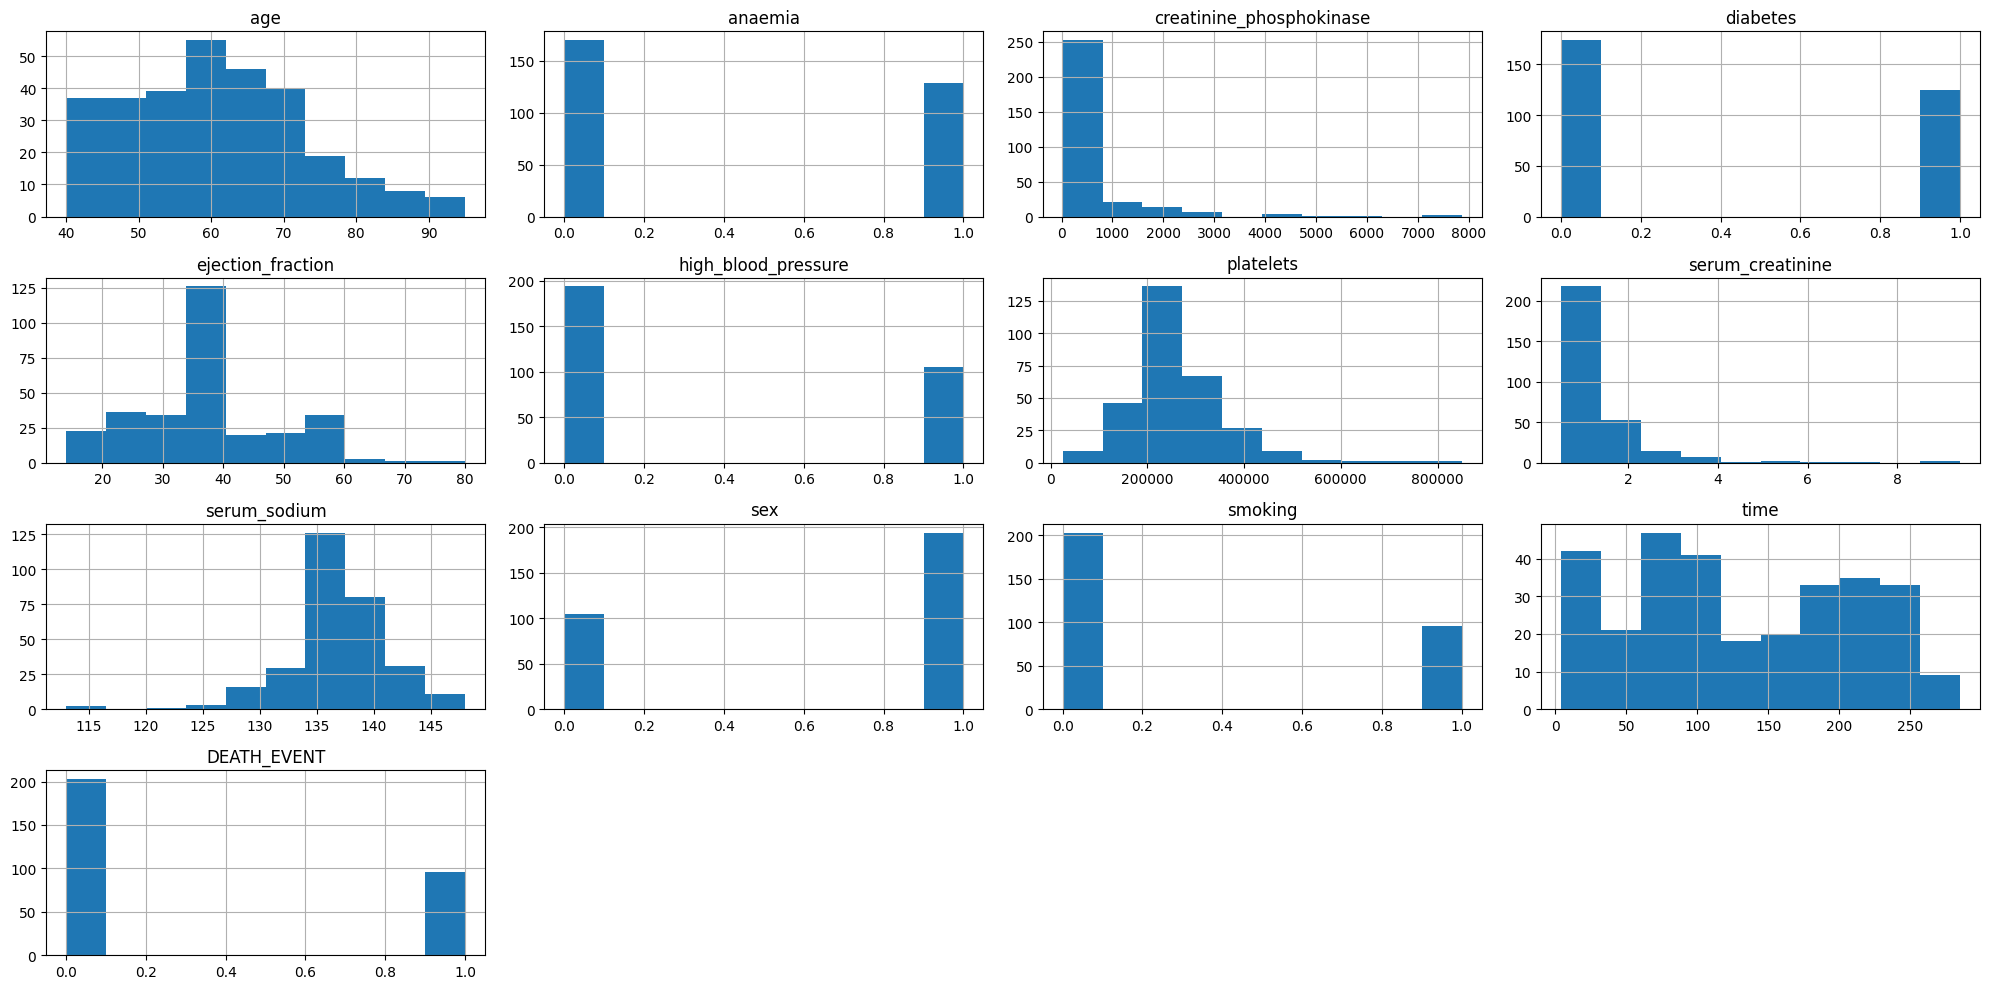

In [6]:
df.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
def splitData(X, y, testSize, randomState):
    return train_test_split(X, y, test_size=testSize, random_state=randomState)

In [8]:
def removeCategories(df):
    feature_cols = df.columns.tolist()
    #print("all feature columns", feature_cols)
    count = 0
    popped_features = []
    for i in range(len(feature_cols)):
        if isinstance(df.loc[0, feature_cols[count]], str):
            temp = feature_cols.pop(count)
            popped_features.append(temp)
            if count == 0:
                count = 0;
            else:
                count = count
        else:
            count = count + 1
    #print("feature columns without categorical items", feature_cols)   
    return feature_cols, popped_features   

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def standardizeFeatures(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [10]:
feature_cols, popped_features = removeCategories(df)
label = feature_cols.pop(-1)

In [11]:
feature_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [12]:
label

'DEATH_EVENT'

In [13]:

X = df[feature_cols]
y = df[label]

In [14]:
X.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [15]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

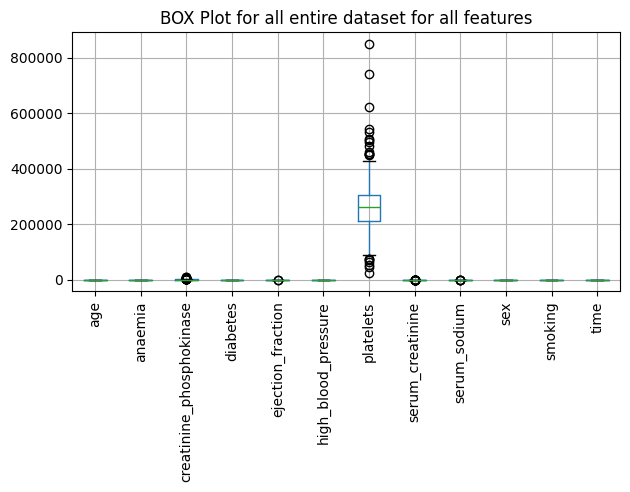

In [16]:
X.boxplot(rot=90)
plt.tight_layout()
plt.title("BOX Plot for all entire dataset for all features")
plt.show()

In [17]:
X = standardizeFeatures(X)

In [18]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [19]:
X

array([[[ 1.19294523e+00],
        [-8.71104775e-01],
        [ 1.65728387e-04],
        ...,
        [ 7.35688190e-01],
        [-6.87681906e-01],
        [-1.62950241e+00]],

       [[-4.91279276e-01],
        [-8.71104775e-01],
        [ 7.51463953e+00],
        ...,
        [ 7.35688190e-01],
        [-6.87681906e-01],
        [-1.60369074e+00]],

       [[ 3.50832977e-01],
        [-8.71104775e-01],
        [-4.49938761e-01],
        ...,
        [ 7.35688190e-01],
        [ 1.45416070e+00],
        [-1.59078490e+00]],

       ...,

       [[-1.33339153e+00],
        [-8.71104775e-01],
        [ 1.52597865e+00],
        ...,
        [-1.35927151e+00],
        [-6.87681906e-01],
        [ 1.90669738e+00]],

       [[-1.33339153e+00],
        [-8.71104775e-01],
        [ 1.89039811e+00],
        ...,
        [ 7.35688190e-01],
        [ 1.45416070e+00],
        [ 1.93250906e+00]],

       [[-9.12335403e-01],
        [-8.71104775e-01],
        [-3.98321274e-01],
        ...,
        

In [20]:
X_train, X_test, y_train, y_test = splitData(X, y, 0.24, 9)
X_train.shape

(227, 12, 1)

In [21]:
X_train.shape[1]

12

In [22]:
model = Sequential()

In [23]:
# CNN first layer (with 32 2 1D filter)
# kernel_size=2 is a 1D filter that slides over sequence dimension. At each position, it looks at 2 consecutive values for each channel
# each filter produces a single output value at each position (2 time steps at a time)
#model.add(Input(shape=(12, 1)))
model.add(layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(12, 1)))
#model.add(layers.Conv1D(32, kernel_size=2, activation='relu'))

C:\Users\hadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Pooling layer
model.add(layers.MaxPooling1D(pool_size=2))
# more hidden layers
model.add(layers.Conv1D(64, kernel_size=2, activation='relu', padding="same"))
model.add(layers.GlobalAveragePooling1D())
# Fully connected layer with 64 neurons & Relu activation (Learns 64 features from previous layer's output)
model.add(layers.Dense(64, activation='relu'))
# Binary classification (outputs a probability between 0 & 1 for binary prediction)
model.add(layers.Dense(1, activation='sigmoid')) 

In [25]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# train model
history = model.fit(X_train, y_train, epochs=42, batch_size=16, validation_split=0.1)

Epoch 1/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5964 - loss: 0.6794 - val_accuracy: 0.6957 - val_loss: 0.6482
Epoch 2/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6865 - loss: 0.6432 - val_accuracy: 0.6957 - val_loss: 0.6449
Epoch 3/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6763 - loss: 0.6456 - val_accuracy: 0.6957 - val_loss: 0.6406
Epoch 4/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6405 - loss: 0.6572 - val_accuracy: 0.6957 - val_loss: 0.6435
Epoch 5/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6458 - loss: 0.6498 - val_accuracy: 0.6957 - val_loss: 0.6430
Epoch 6/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6653 - loss: 0.6391 - val_accuracy: 0.6957 - val_loss: 0.6403
Epoch 7/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6700 - loss: 0.6364 - val_accuracy: 0.6957 - val_loss: 0.6394
Epoch 8/42
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6971 - loss: 0.6155 - val_accuracy: 0.6957 - v

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7057 - loss: 0.6808
Test Accuracy: 0.7083


In [28]:
from scipy.ndimage import gaussian_filter1d
smooth_acc = gaussian_filter1d(history.history['accuracy'], sigma=1)

smooth_val_acc = gaussian_filter1d(history.history['val_accuracy'], sigma=1)

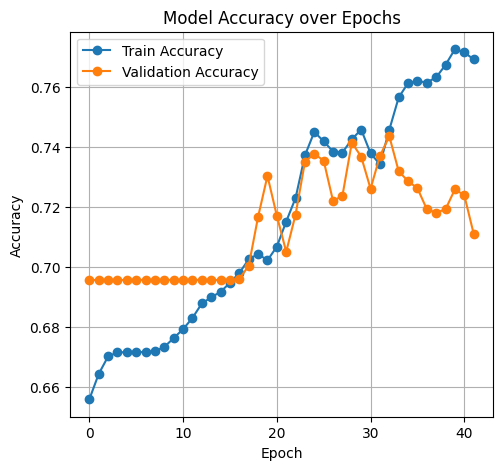

In [29]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12,5))


# Accuracy plot
plt.subplot(1,2,1)
plt.plot(smooth_acc, label='Train Accuracy', marker='o')
plt.plot(smooth_val_acc, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


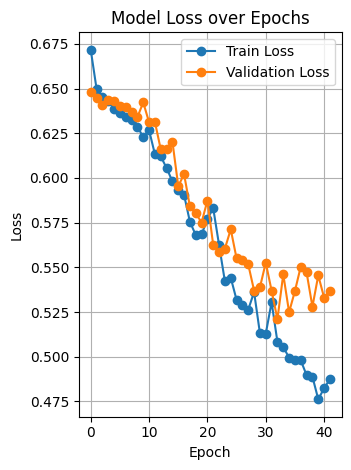

In [30]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,445 (99.40 KB)

 Trainable params: 8,481 (33.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,964 (66.27 KB)

In [32]:
# for the 1st CNN layer -> (filter_size + bias) * # of filters --> (2 + 1) * 32 = 3 * 32 = 96
# max_pooling layer doesn't have any weights or biases to learn ---> it just performs a fixed operation of taking max value over defined window 
# for 2nd CNN layer  -->  output from previos layer * (filter_size + bias) * # of filters in this layer ---> (32 * 2 +1 ) * 64 = 65 * 64 =  4160

In [33]:
os.system("dot -V")

1

In [34]:
import graphviz
import pydot
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

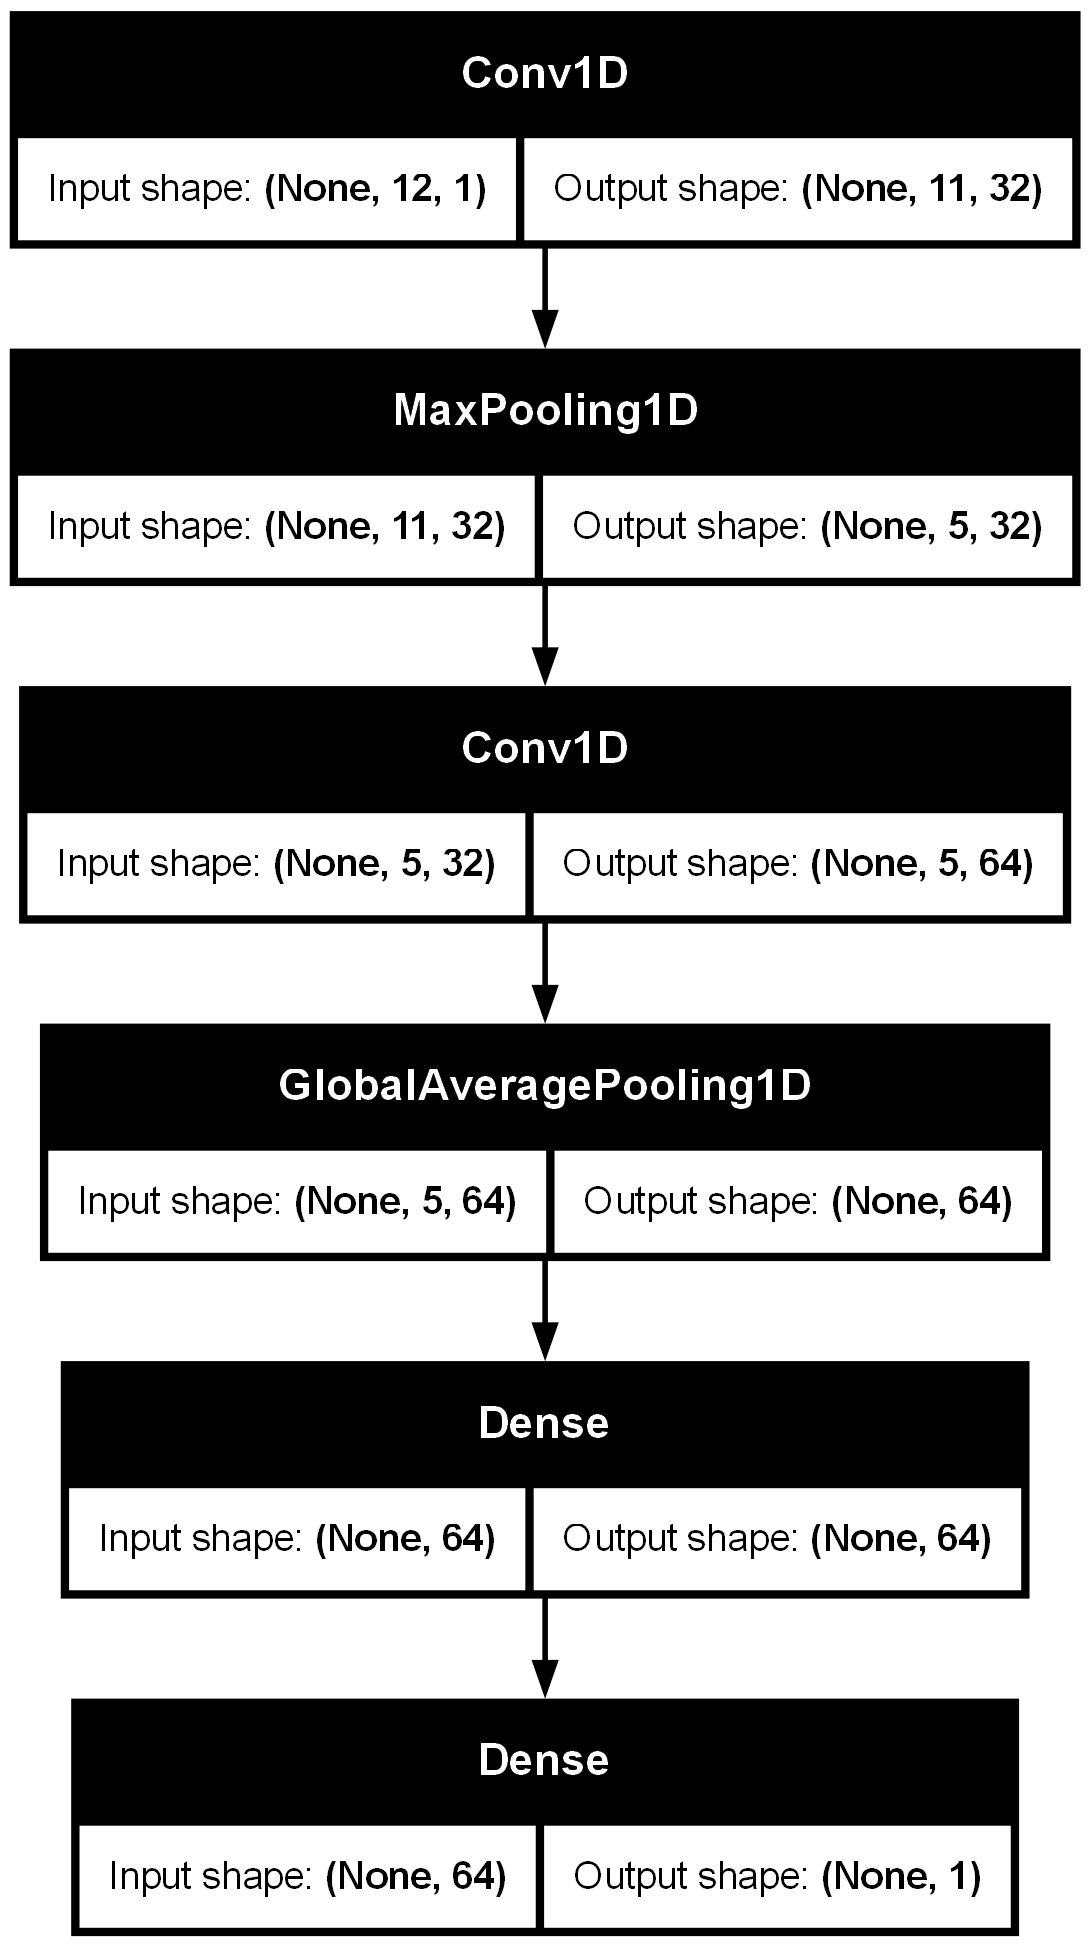

In [35]:
keras.utils.plot_model(model, show_shapes=True)